In [5]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fontsize = 16
plt.rc('font', family='Times New Roman', weight='bold', size=fontsize)
plt.rc('lines', lw=3.5)
plt.rcParams.update({'font.size': fontsize})

sns.set_context("paper", rc={
    "font.size":fontsize,
    "axes.titlesize":fontsize,
    "axes.labelsize":fontsize,
    "xtick.labelsize": fontsize,
    'ytick.labelsize': fontsize,
    'grid.linewidth': 1.5,
                            })
sns.set_style("ticks", {"xtick.major.size": 14, "ytick.major.size": 14})




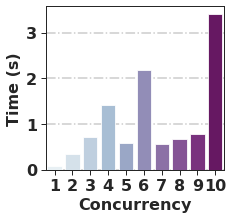

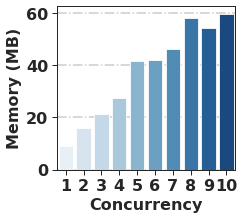

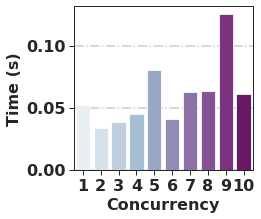

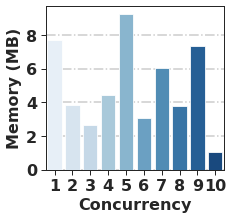

In [11]:
def plot_bar_figure(x, y, classification_by, title, y_limit, palette, data, x_label='Concurrency', y_label="Invocation latency (s)"):
    plt.grid(axis='y', linestyle='-.')
    sns.barplot(x=x, y=y,
                #  hue=classification_by,
                data=data,
                # order=function_order,
                # ci=None,
                palette=palette
                )
    plt.xlabel(x_label, weight="bold")
    plt.ylabel(y_label, weight="bold")
    if y_limit:
        plt.ylim([0, y_limit])
    # plt.title(title)
    return plt
csvs = ["boto3_client_native.csv", "boto3_client_optimize.csv"]
csvs = ['s3_resource_native.csv', 's3_resource_optimize.csv']
for csv in csvs:
    df = pd.read_csv(csv)
    fig, ax1 = plt.subplots(figsize=(3.2, 3))
    df['time(s)'] = df['time(ms)'] / 1000
    time_plot = plot_bar_figure(x='concurrency', y='time(s)', classification_by="",
                                y_limit=None, title="ti", data=df, y_label="Time (s)", palette="BuPu")
    # time_plot.savefig(f"concurrencyS3Time.pdf", dpi=800, bbox_inches = 'tight', format='pdf')
    time_plot.show()
    fig, ax1 = plt.subplots(figsize=(3.2, 3))
    mem_plot = plot_bar_figure(x='concurrency', y='memory(MB)', classification_by="",
                            y_limit=None, title="ti", data=df, y_label="Memory (MB)", palette="Blues")
    # mem_plot.savefig(f"concurrencyS3Mem.pdf", dpi=800, bbox_inches = 'tight', format='pdf')
